In [2]:
#Task3: Gaussian Mixture Model
#Step1: Step 1: Create Two Clusters
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)

# Cluster 1
mean1 = [4.5, 1.8]
cov1 = [[0.2, 0.05],
        [0.05, 0.1]]

data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Cluster 2
mean2 = [6.0, 2.5]
cov2 = [[0.3, -0.04],
        [-0.04, 0.2]]

data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Combine
X = np.vstack((data1, data2))




In [3]:
#means → centers of clusters (high usage / low usage houses)

#covariances → spread of clusters

#weights → probability of each cluster
# We start with random guesses.


k = 2  # number of clusters

n, d = X.shape  # n samples, d features

# Initial means
means = X[np.random.choice(n, k, replace=False)]

# Initial covariance matrices
covariances = [np.cov(X.T) for _ in range(k)]

# Initial mixing coefficients
weights = np.ones(k) / k


In [3]:
iterations = 2

for step in range(iterations):

    # E-step
    responsibilities = np.zeros((n, k))
    for i in range(k):
        rv = multivariate_normal(means[i], covariances[i])
        responsibilities[:, i] = weights[i] * rv.pdf(X)
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # M-step
    Nk = responsibilities.sum(axis=0)
    weights = Nk / n
    means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]

    covariances = []
    for i in range(k):
        diff = X - means[i]
        cov = np.dot(responsibilities[:, i] * diff.T, diff) / Nk[i]
        covariances.append(cov)


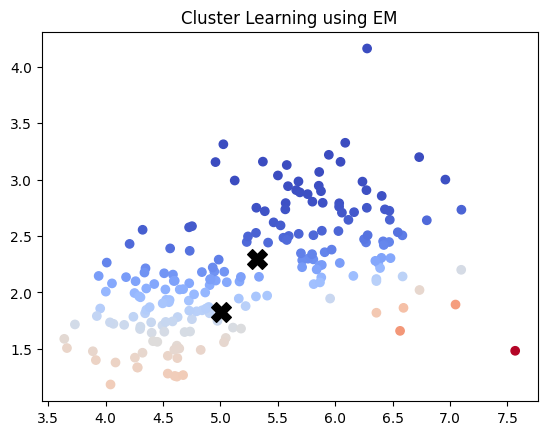

In [4]:
plt.scatter(X[:,0], X[:,1], c=responsibilities[:,0], cmap='coolwarm')
plt.scatter(means[:,0], means[:,1], c='black', marker='X', s=200)
plt.title("Cluster Learning using EM")
plt.show()


In [ ]:
#plot and see how many gaussians, see mixture model density, what is em and hwat is haoennig in diffrent steps, 
# there are only 2 iterations chnage the interations and see how mu sigma and r values and changing by printng them

ITERATION 1

Responsibilities (first 5 rows):
[[0.40024581 0.59975419]
 [0.14298951 0.85701049]
 [0.34863221 0.65136779]
 [0.32216697 0.67783303]
 [0.19773694 0.80226306]]

Updated Weights: [0.22665726 0.77334274]

Updated Means (mu):
 [[4.9633731  1.80126726]
 [5.32423324 2.29818696]]

Updated Covariances (sigma):
Sigma 0:
 [[0.76218528 0.15225436]
 [0.15225436 0.13326418]]
Sigma 1:
 [[0.68356607 0.22655747]
 [0.22655747 0.23409549]]
ITERATION 2

Responsibilities (first 5 rows):
[[0.41780931 0.58219069]
 [0.20971121 0.79028879]
 [0.3690558  0.6309442 ]
 [0.42071072 0.57928928]
 [0.23349472 0.76650528]]

Updated Weights: [0.23195943 0.76804057]

Updated Means (mu):
 [[5.00162794 1.82305168]
 [5.31517092 2.29503824]]

Updated Covariances (sigma):
Sigma 0:
 [[0.84396031 0.13041769]
 [0.13041769 0.10927721]]
Sigma 1:
 [[0.6652414  0.24026261]
 [0.24026261 0.24671676]]
ITERATION 3

Responsibilities (first 5 rows):
[[0.41372774 0.58627226]
 [0.25117995 0.74882005]
 [0.36994108 0.63005892]
 

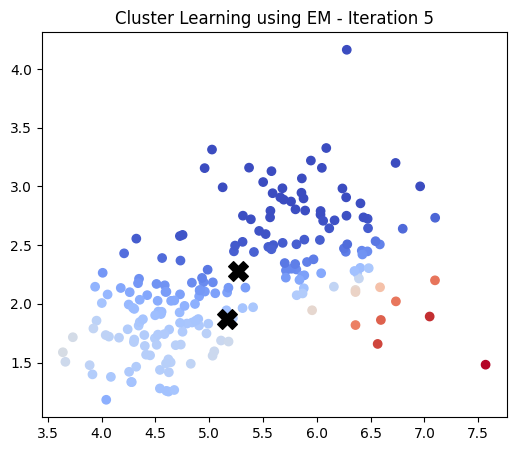

ITERATION 6

Responsibilities (first 5 rows):
[[0.34272927 0.65727073]
 [0.27170714 0.72829286]
 [0.32352645 0.67647355]
 [0.43782381 0.56217619]
 [0.22947969 0.77052031]]

Updated Weights: [0.22829194 0.77170806]

Updated Means (mu):
 [[5.21650045 1.89168895]
 [5.25011577 2.27249041]]

Updated Covariances (sigma):
Sigma 0:
 [[1.01920739 0.12278725]
 [0.12278725 0.09287353]]
Sigma 1:
 [[0.63668537 0.27323965]
 [0.27323965 0.26924001]]
ITERATION 7

Responsibilities (first 5 rows):
[[0.31493374 0.68506626]
 [0.26661931 0.73338069]
 [0.30345472 0.69654528]
 [0.41052323 0.58947677]
 [0.2217401  0.7782599 ]]

Updated Weights: [0.22380009 0.77619991]

Updated Means (mu):
 [[5.26715214 1.90975444]
 [5.23531695 2.26507793]]

Updated Covariances (sigma):
Sigma 0:
 [[1.03372888 0.12361805]
 [0.12361805 0.0935588 ]]
Sigma 1:
 [[0.63474172 0.27756643]
 [0.27756643 0.27267894]]
ITERATION 8

Responsibilities (first 5 rows):
[[0.28779357 0.71220643]
 [0.26073524 0.73926476]
 [0.28328647 0.71671353]
 

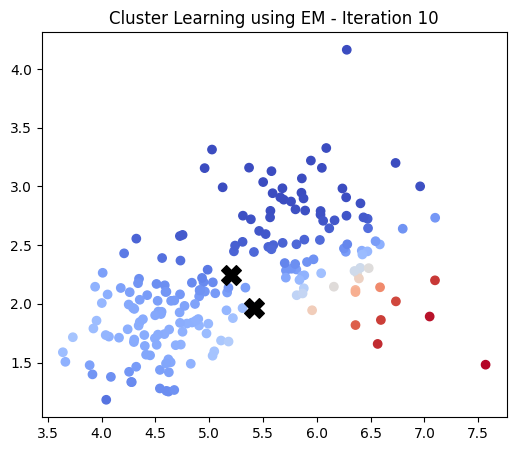

ITERATION 11

Responsibilities (first 5 rows):
[[0.21471808 0.78528192]
 [0.24049711 0.75950289]
 [0.22687569 0.77312431]
 [0.29477733 0.70522267]
 [0.18975737 0.81024263]]

Updated Weights: [0.20691198 0.79308802]

Updated Means (mu):
 [[5.45793853 1.98027456]
 [5.18621981 2.23911335]]

Updated Covariances (sigma):
Sigma 0:
 [[1.04248849 0.11780722]
 [0.11780722 0.09758212]]
Sigma 1:
 [[0.62589792 0.28787897]
 [0.28787897 0.28160664]]
ITERATION 12

Responsibilities (first 5 rows):
[[0.19349683 0.80650317]
 [0.23272557 0.76727443]
 [0.20996646 0.79003354]
 [0.26697481 0.73302519]
 [0.18190769 0.81809231]]

Updated Weights: [0.20350355 0.79649645]

Updated Means (mu):
 [[5.50347161 1.99735021]
 [5.17574894 2.2336429 ]]

Updated Covariances (sigma):
Sigma 0:
 [[1.03385383 0.1142709 ]
 [0.1142709  0.0984863 ]]
Sigma 1:
 [[0.62324121 0.28932359]
 [0.28932359 0.28302893]]
ITERATION 13

Responsibilities (first 5 rows):
[[0.17373578 0.82626422]
 [0.22430507 0.77569493]
 [0.19397998 0.80602002

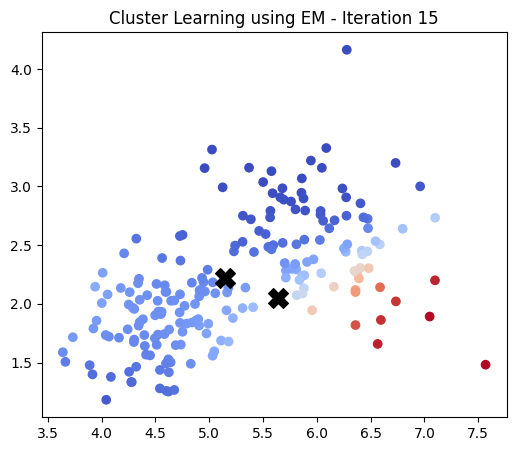

ITERATION 16

Responsibilities (first 5 rows):
[[0.1215629  0.8784371 ]
 [0.19402196 0.80597804]
 [0.15024861 0.84975139]
 [0.16319604 0.83680396]
 [0.15058044 0.84941956]]

Updated Weights: [0.19353588 0.80646412]

Updated Means (mu):
 [[5.68233794 2.06497816]
 [5.13687502 2.21449299]]

Updated Covariances (sigma):
Sigma 0:
 [[0.95780039 0.09307852]
 [0.09307852 0.10134203]]
Sigma 1:
 [[0.61057152 0.2924653 ]
 [0.2924653  0.28695831]]
ITERATION 17

Responsibilities (first 5 rows):
[[0.10589809 0.89410191]
 [0.18167059 0.81832941]
 [0.13647313 0.86352687]
 [0.13892013 0.86107987]
 [0.14226405 0.85773595]]

Updated Weights: [0.19184463 0.80815537]

Updated Means (mu):
 [[5.72803953 2.08237915]
 [5.12716762 2.21004934]]

Updated Covariances (sigma):
Sigma 0:
 [[0.92745467 0.08591484]
 [0.08591484 0.10188945]]
Sigma 1:
 [[0.60669907 0.29271491]
 [0.29271491 0.28763029]]
ITERATION 18

Responsibilities (first 5 rows):
[[0.09076107 0.90923893]
 [0.16773003 0.83226997]
 [0.12271625 0.87728375

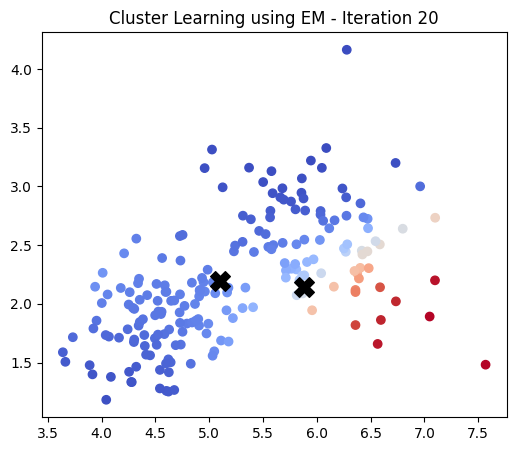

ITERATION 21

Responsibilities (first 5 rows):
[[0.04685315 0.95314685]
 [0.11156097 0.88843903]
 [0.07848028 0.92151972]
 [0.04846715 0.95153285]
 [0.09998792 0.90001208]]

Updated Weights: [0.1872603 0.8127397]

Updated Means (mu):
 [[5.93653265 2.1618286 ]
 [5.08251877 2.19102356]]

Updated Covariances (sigma):
Sigma 0:
 [[0.73465026 0.04483446]
 [0.04483446 0.10366004]]
Sigma 1:
 [[0.58522952 0.2910485 ]
 [0.2910485  0.28912441]]
ITERATION 22

Responsibilities (first 5 rows):
[[0.03261425 0.96738575]
 [0.08613868 0.91386132]
 [0.06155399 0.93844601]
 [0.02933141 0.97066859]
 [0.08463279 0.91536721]]

Updated Weights: [0.18656222 0.81343778]

Updated Means (mu):
 [[6.00155912 2.18666171]
 [5.06833784 2.18530302]]

Updated Covariances (sigma):
Sigma 0:
 [[0.6573403  0.02934521]
 [0.02934521 0.10414764]]
Sigma 1:
 [[0.57707058 0.28948818]
 [0.28948818 0.28901254]]
ITERATION 23

Responsibilities (first 5 rows):
[[0.01923637 0.98076363]
 [0.05731714 0.94268286]
 [0.0431772  0.9568228 ]


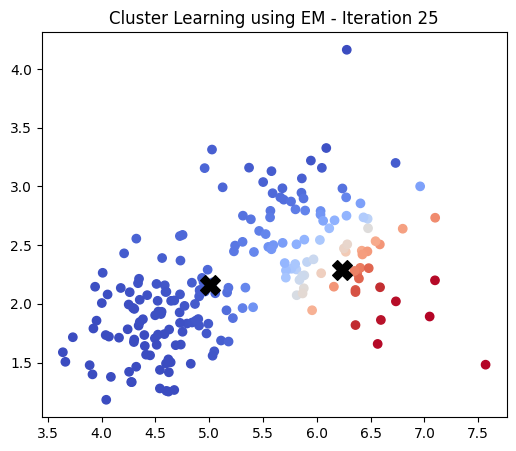

ITERATION 26

Responsibilities (first 5 rows):
[[8.29938461e-05 9.99917006e-01]
 [4.35512877e-04 9.99564487e-01]
 [1.01466835e-03 9.98985332e-01]
 [4.91878357e-06 9.99995081e-01]
 [3.57531786e-03 9.96424682e-01]]

Updated Weights: [0.19831852 0.80168148]

Updated Means (mu):
 [[6.27595316 2.32281375]
 [4.98677346 2.15160205]]

Updated Covariances (sigma):
Sigma 0:
 [[ 0.24235664 -0.05394649]
 [-0.05394649  0.11473865]]
Sigma 1:
 [[0.51380917 0.27037424]
 [0.27037424 0.28329047]]
ITERATION 27

Responsibilities (first 5 rows):
[[6.95472169e-07 9.99999305e-01]
 [4.92266930e-06 9.99995077e-01]
 [3.53571593e-05 9.99964643e-01]
 [4.56125459e-09 9.99999995e-01]
 [2.37189984e-04 9.99762810e-01]]

Updated Weights: [0.21103802 0.78896198]

Updated Means (mu):
 [[6.28571735 2.35848805]
 [4.96337773 2.13929935]]

Updated Covariances (sigma):
Sigma 0:
 [[ 0.20911499 -0.06532296]
 [-0.06532296  0.12268578]]
Sigma 1:
 [[0.49297599 0.26195739]
 [0.26195739 0.27965014]]
ITERATION 28

Responsibilities (

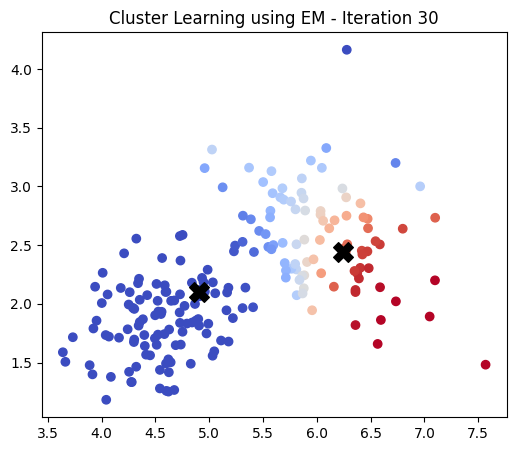

In [ ]:
#Task3: Gaussian Mixture Model
#Step1: Step 1: Create Two Clusters
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)

# Cluster 1
mean1 = [4.5, 1.8]
cov1 = [[0.2, 0.05],
        [0.05, 0.1]]

data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Cluster 2
mean2 = [6.0, 2.5]
cov2 = [[0.3, -0.04],
        [-0.04, 0.2]]

data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Combine
X = np.vstack((data1, data2))

k = 2  # number of clusters
n, d = X.shape  # n samples, d features

# Initial means
means = X[np.random.choice(n, k, replace=False)]

# Initial covariance matrices
covariances = [np.cov(X.T) for _ in range(k)]

# Initial mixing coefficients
weights = np.ones(k) / k

iterations = 30  

# EM Algorithm
for step in range(iterations):

    print(f"ITERATION {step+1}")

    # E STEP
    responsibilities = np.zeros((n, k))

    for i in range(k):
        rv = multivariate_normal(means[i], covariances[i])
        responsibilities[:, i] = weights[i] * rv.pdf(X)

    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    print("\nResponsibilities (first 5 rows):")
    print(responsibilities[:5])

    # M STEP
    Nk = responsibilities.sum(axis=0)

    weights = Nk / n
    means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]

    covariances = []
    for i in range(k):
        diff = X - means[i]
        cov = np.dot(responsibilities[:, i] * diff.T, diff) / Nk[i]
        covariances.append(cov)

    print("\nUpdated Weights:", weights)
    print("\nUpdated Means (mu):\n", means)
    print("\nUpdated Covariances (sigma):")
    for idx, c in enumerate(covariances):
        print(f"Sigma {idx}:\n", c)

    if (step + 1) % 5 == 0:
        plt.figure(figsize=(6,5))
        plt.scatter(X[:,0], X[:,1], c=responsibilities[:,0], cmap='coolwarm')
        plt.scatter(means[:,0], means[:,1], c='black', marker='X', s=200)
        plt.title(f"Cluster Learning using EM - Iteration {step+1}")
        plt.show()


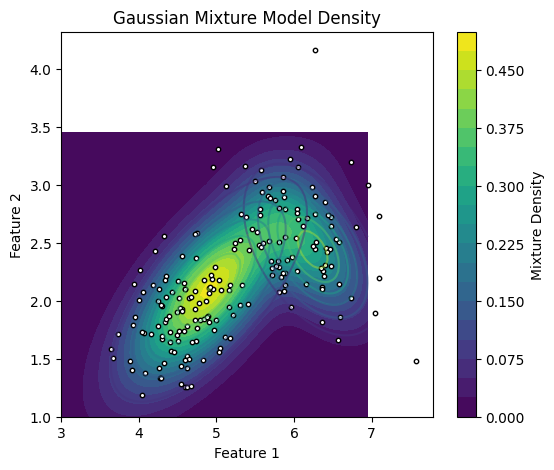

In [8]:
# Step 4: Plot Mixture Model Density

x, y = np.mgrid[3:7:0.05, 1:3.5:0.05]
pos = np.dstack((x,y))

mixture_density = np.zeros(x.shape)

plt.figure(figsize=(6,5))

for i in range(k):
    rv = multivariate_normal(means[i], covariances[i])
    component_density = weights[i] * rv.pdf(pos)

    mixture_density += component_density

    
    plt.contour(x, y, component_density, alpha=0.5)


plt.contourf(x, y, mixture_density, levels=20, cmap="viridis")
plt.colorbar(label="Mixture Density")

plt.scatter(X[:,0], X[:,1], s=10, c='white', edgecolor='k')
plt.title("Gaussian Mixture Model Density")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()